# REACH OF COVID 19 IN INDIA

## Problem Statement
Visualizing the consequences of the lethal pandemic of this era which forced the social animal human being to dissocialize amidst the society, with the help of available datasets.
## Objective
To analyze as well as explorate the reach and behavioral variations of corona virus popularly known as covid-19 on human lives, especially in India.

## Importing Essential Packages 

In [13]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [15]:
import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn import metrics

## Dataset Preprocessing and cleaning

In [16]:
dataset_1=pd.read_csv("C:\\Users\\TANMAY TIWARI\\VIT\\4th Sem\\EDA_PROJECT\\DATASETS\\covid_19_india (1).csv")
dataset2=pd.read_csv("C:\\Users\\TANMAY TIWARI\\VIT\\4th Sem\\EDA_PROJECT\\DATASETS\\covid_vaccine_statewise.csv")

In [17]:
dataset_1.head() 

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [18]:
dataset_1.tail() 

Sno        Date     Time State/UnionTerritory  \
18105  18106  2021-08-11  8:00 AM            Telangana   
18106  18107  2021-08-11  8:00 AM              Tripura   
18107  18108  2021-08-11  8:00 AM          Uttarakhand   
18108  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18109  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
18105                       -                        -   638410    3831   
18106                       -                        -    77811     773   
18107                       -                        -   334650    7368   
18108                       -                        -  1685492   22775   
18109                       -                        -  1506532   18252   

       Confirmed  
18105     650353  
18106      80660  
18107     342462  
18108    1708812  
18109    1534999

In [19]:
dataset_1.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [20]:
dataset_1.shape

(18110, 9)

In [21]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [22]:
dataset_1.isnull()

Sno   Date   Time  State/UnionTerritory  ConfirmedIndianNational  \
0      False  False  False                 False                    False   
1      False  False  False                 False                    False   
2      False  False  False                 False                    False   
3      False  False  False                 False                    False   
4      False  False  False                 False                    False   
...      ...    ...    ...                   ...                      ...   
18105  False  False  False                 False                    False   
18106  False  False  False                 False                    False   
18107  False  False  False                 False                    False   
18108  False  False  False                 False                    False   
18109  False  False  False                 False                    False   

       ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                         False  False   False      False  
1                         False  False   False      False  
2                         False  False   False      False  
3                         False  False   False      False  
4                         False  False   False      False  
...                         ...    ...     ...        ...  
18105                     False  False   False      False  
18106                     False  False   False      False  
18107                     False  False   False      False  
18108                     False  False   False      False  
18109                     False  False   False      False  

[18110 rows x 9 columns]

In [23]:
dataset_1.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [24]:
dataset_1.describe()

Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.148909e+05   10919.076411  6.561489e+05
min        1.000000  0.000000e+00       0.000000  0.000000e+00
25%     4528.250000  3.360250e+03      32.000000  4.376750e+03
50%     9055.500000  3.336400e+04     588.000000  3.977350e+04
75%    13582.750000  2.788698e+05    3643.750000  3.001498e+05
max    18110.000000  6.159676e+06  134201.000000  6.363442e+06

In [25]:
dataset_1. rename(columns = {'State/UnionTerritory':'State'}, inplace = True)

In [26]:
dataset_1["State"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

#### Dropping column which have not any value in state column

In [27]:
dataset_1.drop(dataset_1[dataset_1['State']=="Unassigned"].index, inplace = True)
dataset_1.drop(dataset_1[dataset_1['State']=="Cases being reassigned to states"].index, inplace = True)

#### Renaming to correct name of all states 

In [28]:
dataset_1.loc[dataset_1["State"]=="Karanataka", "State"]="Karnataka"
dataset_1.loc[dataset_1["State"]=="Bihar****", "State"]="Bihar"
dataset_1.loc[dataset_1["State"]=="Maharashtra***", "State"]="Maharashtra"
dataset_1.loc[dataset_1["State"]=="Andaman and Nicobar Islands", "State"]="Andaman & Nicobar Island"
dataset_1.loc[dataset_1["State"]=="Dadra and Nagar Haveli", "State"]="Dadara & Nagar Havelli"
dataset_1.loc[dataset_1["State"]=="Dadra and Nagar Haveli and Daman and Diu", "State"]="Dadara & Nagar Havelli"
dataset_1.loc[dataset_1["State"]=="Madhya Pradesh***", "State"]="Madhya Pradesh"
dataset_1.loc[dataset_1["State"]=="Himanchal Pradesh", "State"]="Himachal Pradesh"
dataset_1.loc[dataset_1["State"]=="Telengana", "State"]="Telangana"
dataset_1.loc[dataset_1["State"]=="Jammu and Kashmir", "State"]="Jammu & Kashmir"
dataset_1.loc[dataset_1["State"]=="Ladakh", "State"]="Jammu & Kashmir"
dataset_1.loc[dataset_1["State"]=="Delhi", "State"]="NCT of Delhi"
dataset_1.loc[dataset_1["State"]=="Arunachal Pradesh", "State"]="Arunanchal Pradesh"

In this dataset we found that some of the names of the state is not correct.So, it was corrected using this code.

## Dropping the unuseful columns 

In [29]:
dataset_1.drop( columns = ['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Time'],axis=0, inplace  = True )

In [30]:
dataset_1.head(10)

Date   State  Cured  Deaths  Confirmed
0  2020-01-30  Kerala      0       0          1
1  2020-01-31  Kerala      0       0          1
2  2020-02-01  Kerala      0       0          2
3  2020-02-02  Kerala      0       0          3
4  2020-02-03  Kerala      0       0          3
5  2020-02-04  Kerala      0       0          3
6  2020-02-05  Kerala      0       0          3
7  2020-02-06  Kerala      0       0          3
8  2020-02-07  Kerala      0       0          3
9  2020-02-08  Kerala      0       0          3

In [31]:
dataset_1['Date'] = pd.to_datetime(dataset_1['Date'])

In [32]:
print("Number of days of the data sample:",dataset_1['Date'].max()-dataset_1['Date'].min())


Number of days of the data sample: 559 days 00:00:00


## Effect of Covid Statewise


In [33]:
statewise=dataset_1.groupby("State")[["Confirmed","Cured","Deaths"]].sum().reset_index()

In [34]:
statewise

State   Confirmed       Cured    Deaths
0   Andaman & Nicobar Island     1938498     1848286     27136
1             Andhra Pradesh   392432753   370426530   2939367
2         Arunanchal Pradesh     7176907     6588149     26799
3                      Assam    99837011    92678680    638323
4                      Bihar   133662075   126525370   1112347
5                 Chandigarh    10858627    10117035    147694
6               Chhattisgarh   163776262   151609364   2063920
7     Dadara & Nagar Havelli     1959354     1862102      1022
8                Daman & Diu           2           0         0
9                        Goa    28240159    26027201    447801
10                   Gujarat   143420082   132487127   2219448
11                   Haryana   134347285   126585342   1502799
12          Himachal Pradesh    30237805    27701150    494855
13           Jammu & Kashmir    62172019    57056301    885498
14                 Jharkhand    62111994    58034506    748641
15                 Karnataka   488855931   444665851   6089959
16                    Kerala   458906023   420174235   1888177
17               Lakshadweep      915784      820925      3908
18            Madhya Pradesh   136416921   127505732   1788258
19               Maharashtra  1127721063  1024765950  23868185
20                   Manipur    12617943    11230568    173056
21                 Meghalaya     7355969     6537909    101950
22                   Mizoram     2984732     2384602      9791
23              NCT of Delhi   287227765   273419887   4943294
24                  Nagaland     5041742     4519526     58460
25                    Odisha   160130533   150923455    790814
26                Puducherry    20065891    18483117    312155
27                    Punjab    99949702    91458159   2785594
28                 Rajasthan   162369656   150356820   1473089
29                    Sikkim     3186799     2747214     53150
30                Tamil Nadu   431928644   404095807   5916658
31                 Telangana   130562647   122154512    750075
32                   Tripura    14050250    12976846    150342
33             Uttar Pradesh   312625843   291479351   4143450
34               Uttarakhand    53140414    48362741    986001
35               West Bengal   263107876   247515102   3846989

We have added more columns like RECOVERY RATE,MORTALITY RATE,ACTIVE CASES to know more accuratelt the condition of the states.

In [35]:
statewise["Recovery Rate"] = statewise["Cured"]*100 / statewise["Confirmed"]
statewise["Mortality Rate"] = statewise["Deaths"]*100 / statewise["Confirmed"]
statewise["Active Cases"]= statewise["Confirmed"]-(statewise["Cured"]+statewise["Deaths"])

In [36]:
statewise.style.background_gradient(cmap='RdBu_r')

## Visualization by different types of graph 

In [37]:
statewise1=statewise.copy(deep=True)
fig = px.pie(statewise1, values='Confirmed', names='State',width=800,height=500)
fig.update_layout(title="Confirmed cases in various states",)

###### From the above pie chart it is clearly intrepreted that the maximum number of confirmed cases was in Maharastra i.e. 20.7% and numbers are gradually decreasing while going with the other states and the minimum we got from the Andaman and Nicobar  i.e. less than 1%.

In [38]:
statewise1=statewise.copy(deep=True)
#statewise1.loc[statewise1['Cured']< 30000000, 'State'] = 'Other states' 
fig = px.pie(statewise1, values='Cured', names='State',width=800,height=500)
fig.update_layout( title="Cured cases in various states",)

In [39]:
statewise1=statewise.copy(deep=True)
fig = px.pie(statewise1, values='Mortality Rate', names='State',width=800,height=500)
fig.update_layout(title="Mortality Rate cases in various states",)

###### From the above pie chart it is clearly seen that the mortality rate was higher in Punjab i.e. 2.78 and it was followed by Maharastra ,Uttarakhand,Delhi and more and the minimum moratality rate was in Daman and Diu i.e. less than 1 or exact we can say(0.057).

In [40]:
statewise1=statewise.copy(deep=True) 
fig = px.pie(statewise1, values='Recovery Rate', names='State',width=800,height=500)
fig.update_layout(title="Recovery Rate cases in various states",)

###### From the above chart it clearly intrepretet that the highest recovery rate was in Andaman & NIcobar with 95.34% and futher follwed by Delhi(95.18%) and later on it and the lowest recovery rate was found in North eastern state and Maharastra ,Karnataka.

### COVID VISUALIZATION WITH TIME PERIOD

In [41]:
cases=dataset_1.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().reset_index()

In [42]:
fig=px.bar(cases,x='Date',y=cases.columns[3],)
fig.update_layout(
    title="Total Confirmed cases vs Time",
    xaxis_title="Time Period",
    yaxis_title="Cases",
    legend_title="Cases",
    font=dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

###### On the above chart it we have taken time period on x-axis and number of cases on y-axis and the graph clealy shows that the number of cases was not increasing between march to july but after that the number of cases it increases suddenly on higher level and it increases drastically after March 2021 becaus the delta virus phase was there .

In [43]:
fig=px.line(cases,x='Date',y=cases.columns[1:3],)
fig.update_layout(
    title="Total Cured cases &deaths vs Time",
    xaxis_title="Time Period",
    yaxis_title="Cases",
    legend_title="Cases",
    font=dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

###### On the above chart it we have taken time period on x-axis and number of  death cases on y-axis and the graph clealy shows that the number of death was less between march to july but after that the number of drastically it increases suddenly on higher level and it increases drastically after March 2021 becaus the delta virus phase was there .

## COVID VISULIZATION WITH RESPECT TO MONTHS & YEAR

In [44]:
dataset_1['Date']= pd.to_datetime(dataset_1['Date'])          
data_of_20 = dataset_1.loc[dataset_1.Date.dt.year==2020]           
data_of_21 = dataset_1.loc[dataset_1.Date.dt.year==2021] 

In [45]:
data_of_20['Month']=data_of_20['Date'].dt.month                   
data_of_21['Month']=data_of_21['Date'].dt.month  
data20= data_of_20.groupby('Month')[['Confirmed','Deaths','Cured']].sum() 
data21= data_of_21.groupby('Month')[['Confirmed','Deaths','Cured']].sum() 
data20.index=pd.to_datetime( data20.index , format = '%m').strftime( '%B' )
data21.index=pd.to_datetime( data21.index , format = '%m').strftime( '%B' )

C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_9640/1112686033.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_9640/1112686033.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
fig=px.bar(data20,x=data20.index,y=data20.columns[0],)
fig.update_layout(
    title="Total Confirmed over the months in 2020",
    xaxis_title="Months",
    yaxis_title="Cases/deaths",
    legend_title="Types",
    font=dict(size=14)
)
#fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()


#### On the above graph it is clearly seen that in 2020 the the number of confirmed cases gradually inceases month by month and and drastically increased from August to December.


In [47]:
fig=px.line(data20,x=data20.index,y=data20.columns[1:3],)
fig.update_layout(
    title="Total Cured Cases vs Total Deaths over the months in 2020",
    xaxis_title="Months",
    yaxis_title="Cases/deaths",
    legend_title="Types",
    font=dict(size=14)
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()

#### From the above line graph it is clearly seen that the cured rate is increasing and the number of death is less thorughout the year as it was Covid first wave. 

In [48]:
fig=px.line(data21,x=data21.index,y=data21.columns[0:3],)
fig.update_layout(
    title="Total Cured Cases -Total Deaths- Total Confirmed in 2021",
    xaxis_title="Months",
    yaxis_title="Number",
    legend_title="Types",
    font=dict(size=14)
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()

#### From the above line graph it is observed thaat in the year 2021 the confirmed cases increased rapidly and it touched approx total of 1 billion cases in and it gradually fall after August as in this year Covid second wave hit India.

In [49]:
fig=px.line(dataset_1[dataset_1['State'].isin(['Bihar', 'West Bengal', 'Jharkhand'])],x='Date',y='Deaths',color='State')
fig.update_layout(
    title="Trend of Deaths Cases in states",
    xaxis_title="Time Period",
    yaxis_title="Cases",
    legend_title="State",
    font=dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

In [50]:
fig=px.line(dataset_1[dataset_1['State'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh'])],x='Date',y='Deaths',color='State')
fig.update_layout(
    title="Trend of Deaths Cases in states",
    xaxis_title="Time Period",
    yaxis_title="Cases",
    legend_title="State",
    font=dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

              Cured    Deaths  Confirmed
Cured      1.000000  0.917492   0.997749
Deaths     0.917492  1.000000   0.918308
Confirmed  0.997749  0.918308   1.000000


<AxesSubplot:>

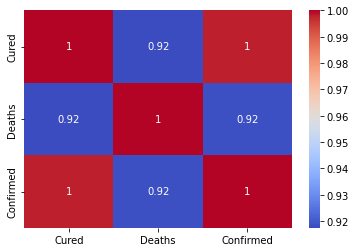

In [51]:
corrMatrix=dataset_1.corr()
print(corrMatrix)
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

<AxesSubplot:>

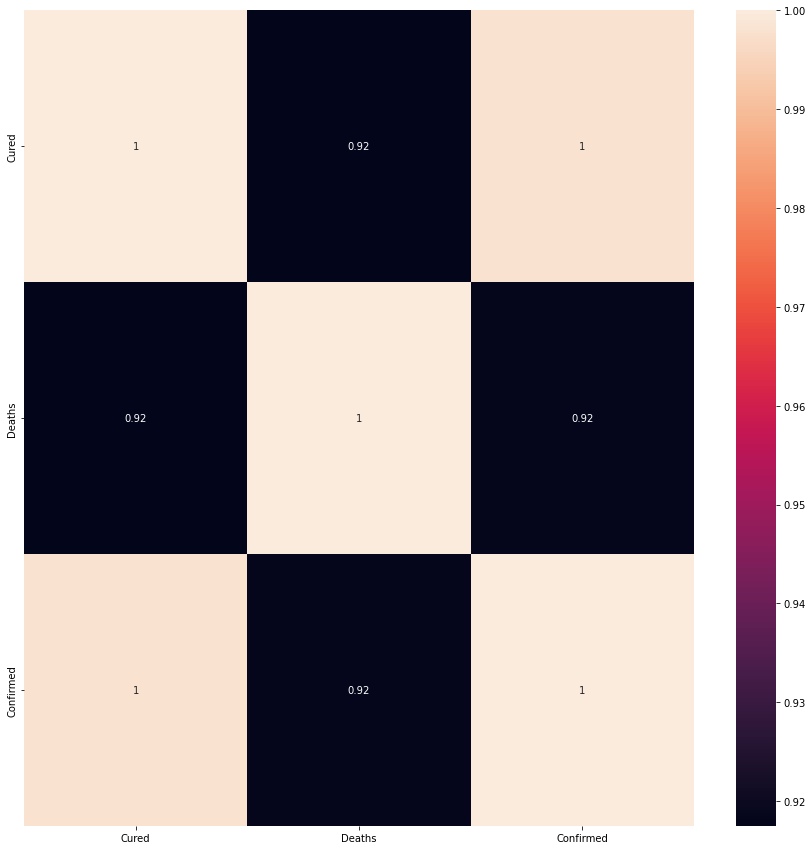

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_1.corr(), color='b', annot=True)

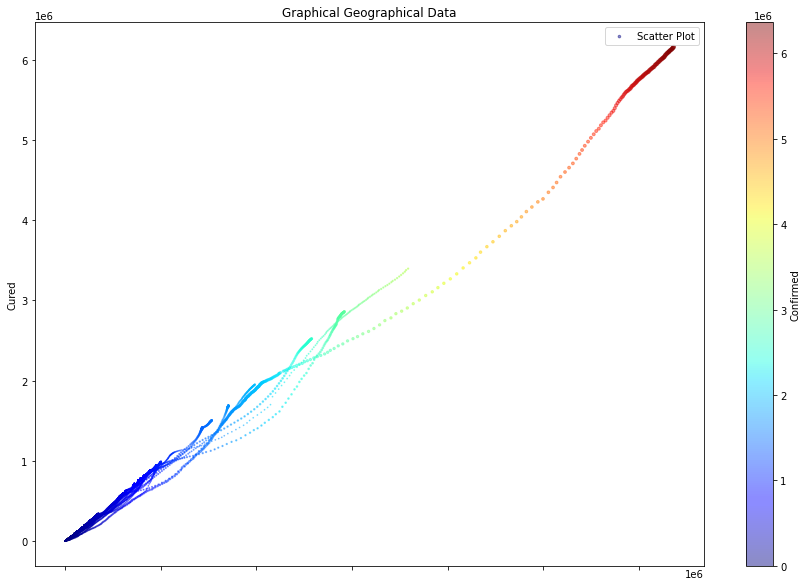

In [53]:
dataset_1.plot(kind = 'scatter',x= 'Confirmed', y='Cured', alpha= 0.45,
        s=dataset_1['Deaths']/10000,c= 'Confirmed', cmap = 'jet',
        label='Scatter Plot',title ='Graphical Geographical Data',figsize= (15,10));

In [54]:
X = np.arange(60)
X = X.reshape(-1,1)

In [55]:
y = dataset_1.iloc[:,-1].values.astype(float)
y

array([1.000000e+00, 1.000000e+00, 2.000000e+00, ..., 3.424620e+05,
       1.708812e+06, 1.534999e+06])

In [56]:
y = np.diff(y)
y = y.reshape(-1,1)
y

array([[ 0.00000e+00],
       [ 1.00000e+00],
       [ 1.00000e+00],
       ...,
       [ 2.61802e+05],
       [ 1.36635e+06],
       [-1.73813e+05]])

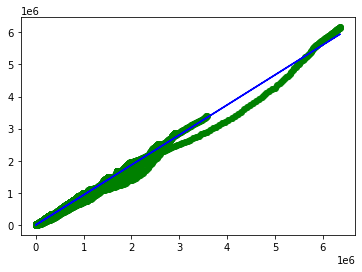

In [57]:
x=dataset_1['Confirmed']
y=dataset_1['Cured']
plt.plot(x, y, 'o', color='green')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='blue')

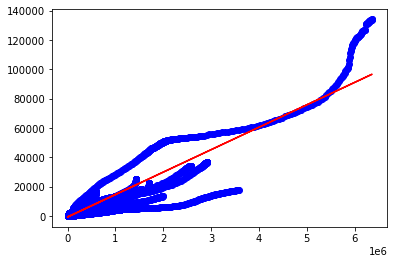

In [58]:
x=dataset_1['Confirmed']
y=dataset_1['Deaths']
plt.plot(x, y, 'o', color='blue')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

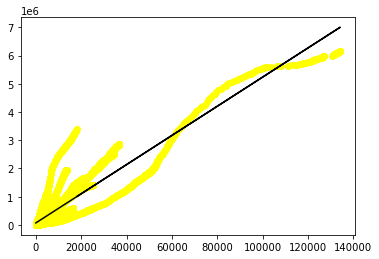

In [59]:
x=dataset_1['Deaths']
y=dataset_1['Cured']
plt.plot(x, y, 'o', color='yellow')
m, b = np.polyfit(x, y, 1)
#use red as color for regression line
plt.plot(x, m*x+b, color='black')

In [60]:
from scipy import stats
z= np.abs(stats.zscore(dataset_1['Confirmed']))
print(z)
df1=dataset_1['Confirmed']

0        0.459730
1        0.459730
2        0.459729
3        0.459727
4        0.459727
           ...   
18105    0.530088
18106    0.336969
18107    0.061486
18108    2.141033
18109    1.876494
Name: Confirmed, Length: 18047, dtype: float64


In [61]:
df_outlier=df1[(z<3)]


In [62]:
df_outlier


0              1
1              1
2              2
3              3
4              3
          ...   
18105     650353
18106      80660
18107     342462
18108    1708812
18109    1534999
Name: Confirmed, Length: 17665, dtype: int64

In [63]:
q1=dataset_1.quantile(0.25)
q2=dataset_1.quantile(0.75)
q3=q2-q1
q3


Cured        277287.0
Deaths         3635.5
Confirmed    296893.5
dtype: float64

In [64]:
from scipy import stats
z= np.abs(stats.zscore(dataset_1['Deaths']))
print(z)
df2=dataset_1['Deaths']

0        0.371877
1        0.371877
2        0.371877
3        0.371877
4        0.371877
           ...   
18105    0.021540
18106    0.301188
18107    0.301911
18108    1.710849
18109    1.297230
Name: Deaths, Length: 18047, dtype: float64


In [65]:
df_outlier2=df2[(z<3)]
df_outlier2


0            0
1            0
2            0
3            0
4            0
         ...  
18105     3831
18106      773
18107     7368
18108    22775
18109    18252
Name: Deaths, Length: 17733, dtype: int64

# District Wise Visualization


In [66]:
import seaborn as sns;sns.set(style='whitegrid')
%matplotlib inline
from numpy.linalg import pinv,inv
import matplotlib.image as mpimg
import gc
from pandas.plotting import scatter_matrix
import plotly.express as px

In [80]:
df_district = pd.read_csv("C:\\Users\\TANMAY TIWARI\\VIT\\4th Sem\\EDA_PROJECT\\DATASETS\\district_level_latest.csv")
df_district.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\TANMAY TIWARI\\VIT\\4th Sem\\EDA_PROJECT\\DATASETS\\district_level_latest.csv'

In [81]:
df_district.info()

NameError: name 'df_district' is not defined

In [ ]:
df_district.describe()

In [68]:
df_district.duplicated().sum()

NameError: name 'df_district' is not defined

In [69]:
df_district.dtypes

NameError: name 'df_district' is not defined

In [70]:
df_district.isnull().sum()

NameError: name 'df_district' is not defined

In [71]:
grouped_df_district = df_district[["state","district","confirmed","active","recovered","deaths"]]
grouped_df_district

NameError: name 'df_district' is not defined

In [72]:
grouped_df_district1 = df_district[["district","delta_confirmed","delta_deceased","delta_recovered"]]
grouped_df_district1

NameError: name 'df_district' is not defined

In [73]:
grouped_df_district = grouped_df_district.sort_values(by="confirmed",ascending=False)
grouped_df_district = grouped_df_district.reset_index(drop=True)
grouped_df_district

NameError: name 'grouped_df_district' is not defined

In [74]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='active', data=grouped_df_district.nlargest(10,'active'))
plt.show()

NameError: name 'grouped_df_district' is not defined

In [75]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='recovered', data=grouped_df_district.nlargest(10,'recovered'))
plt.show()

NameError: name 'grouped_df_district' is not defined

In [76]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='deaths', data=grouped_df_district.nlargest(10,'deaths'))
plt.show()

NameError: name 'grouped_df_district' is not defined

In [77]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='delta_confirmed', data=grouped_df_district1.nlargest(10,'delta_confirmed'))
plt.show()

NameError: name 'grouped_df_district1' is not defined

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='delta_deceased', data=grouped_df_district1.nlargest(10,'delta_deceased'))
plt.show()

NameError: name 'grouped_df_district1' is not defined

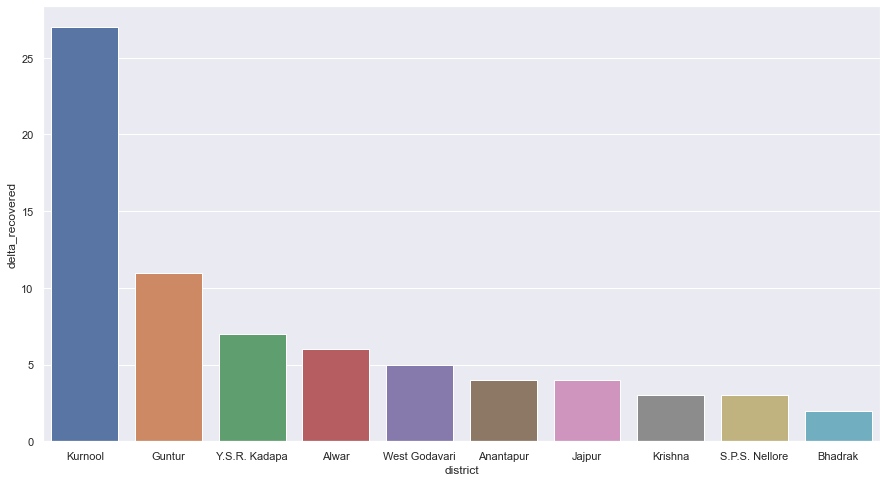

In [94]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='district', y='delta_recovered', data=grouped_df_district1.nlargest(10,'delta_recovered'))
plt.show()

In [95]:

data = df_district[df_district.sum(axis = 1) > 0]
data = data.groupby(['state'])['deaths'].sum().reset_index()
data_death = data[data['deaths'] > 0]
state_fig = px.bar(data_death, x='state', y='deaths', title='State wise deaths reported of COVID-19 in India', text='deaths')
state_fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9616\3214162351.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [96]:

data = df_district[df_district.sum(axis = 1) > 0]
data = data.groupby(['state'])['recovered'].sum().reset_index()
data_death = data[data['recovered'] > 0]
state_fig = px.bar(data_death, x='state', y='recovered', title='State wise recovered reported of COVID-19 in India', text='recovered')
state_fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9616\3184094857.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



C:\Users\user\AppData\Local\Temp\ipykernel_9616\1183842964.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



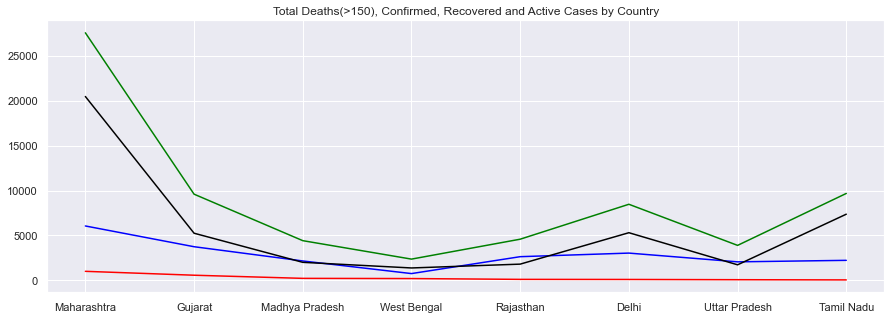

In [97]:
df_district['active'] = df_district['confirmed'] - df_district['deaths'] - df_district['recovered']
 
r_data = df_district.groupby(["state"])["deaths", "confirmed", "recovered", "active"].sum().reset_index()
r_data = r_data.sort_values(by='deaths', ascending=False)
r_data = r_data[r_data['deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['state'], r_data['deaths'],color='red')
plt.plot(r_data['state'], r_data['confirmed'],color='green')
plt.plot(r_data['state'], r_data['recovered'], color='blue')
plt.plot(r_data['state'], r_data['active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()

In this graph red on shows number of deaths,green represents confirmed cases,blue one shows recovered number of people and last black represents the current active cases at that time.

In [98]:
df_district["deaths"] = pd.cut(df_district["deaths"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [99]:
dataset = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\4th semester\\EDA\\Project\\district_level_latest.csv')
x = dataset.iloc[3:, :-1].values
y = dataset.iloc[4:, 1].values

In [100]:
x_train = df_district.active

In [101]:
y_train = df_district.recovered

In [102]:
x_train.head()

0     0
1     0
2     0
3    62
4    88
Name: active, dtype: int64

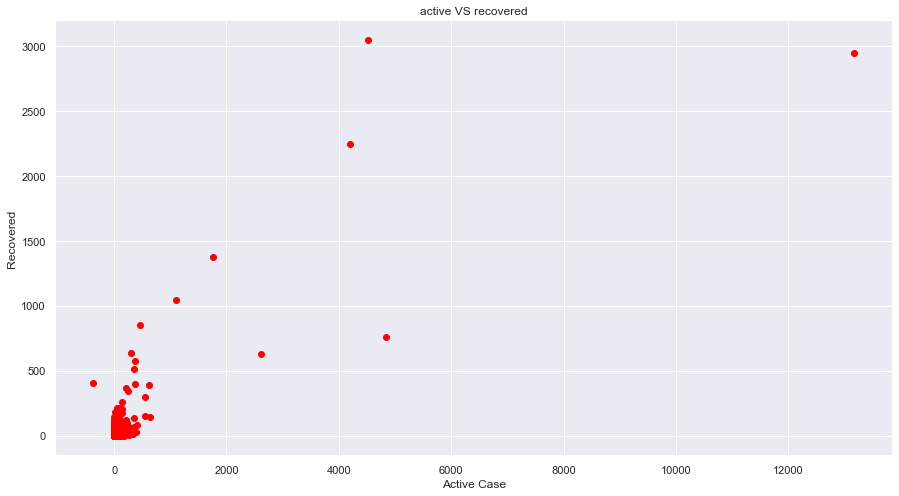

In [103]:
plt.scatter(x_train, y_train, color = "red")
plt.title("active VS recovered")
plt.xlabel("Active Case")
plt.ylabel("Recovered")
plt.show()

In [104]:
gb = df_district.groupby('state')
gb.first()

state code                district  \
state                                                                         
Andaman and Nicobar Islands                      AN                Nicobars   
Andhra Pradesh                                   AP               Anantapur   
Arunachal Pradesh                                AR                   Anjaw   
Assam                                            AS                   Baksa   
Bihar                                            BR                  Araria   
Chandigarh                                       CH              Chandigarh   
Chhattisgarh                                     CT                   Balod   
Dadra and Nagar Haveli and Daman and Diu         DN  Dadra and Nagar Haveli   
Delhi                                            DL           Central Delhi   
Goa                                              GA               North Goa   
Gujarat                                          GJ             Other State   
Haryana                                          HR                  Ambala   
Himachal Pradesh                                 HP                Bilaspur   
Jammu and Kashmir                                JK                Anantnag   
Jharkhand                                        JH                  Bokaro   
Karnataka                                        KA               Bagalkote   
Kerala                                           KL               Alappuzha   
Ladakh                                           LA                  Kargil   
Lakshadweep                                      LD             Lakshadweep   
Madhya Pradesh                                   MP              Agar Malwa   
Maharashtra                                      MH              Ahmednagar   
Manipur                                          MN               Bishnupur   
Meghalaya                                        ML         East Garo Hills   
Mizoram                                          MZ                  Aizawl   
Nagaland                                         NL                 Dimapur   
Odisha                                           OR                   Angul   
Puducherry                                       PY                Karaikal   
Punjab                                           PB                Amritsar   
Rajasthan                                        RJ                   Ajmer   
Sikkim                                           SK           East District   
Tamil Nadu                                       TN      Airport Quarantine   
Telangana                                        TG             Other State   
Tripura                                          TR                  Dhalai   
Uttar Pradesh                                    UP                    Agra   
Uttarakhand                                      UT                  Almora   
West Bengal                                      WB              Alipurduar   

                                          confirmed  active deaths  recovered  \
state                                                                           
Andaman and Nicobar Islands                       0       0    NaN          0   
Andhra Pradesh                                  122      62      3         56   
Arunachal Pradesh                                 0       0    NaN          0   
Assam                                             0       0      1          0   
Bihar                                             4       3      1          1   
Chandigarh                                      191     151      2         37   
Chhattisgarh                                      1       1    NaN          0   
Dadra and Nagar Haveli and Daman and Diu          1       0    NaN          1   
Delhi                                           184     184      1          0   
Goa                                               6       0    NaN          6   
Gujarat                                           1       1      5

In [105]:
gbb = df_district.groupby(['state', 'active'])
gbb.first()

state code           district  confirmed  \
state                       active                                            
Andaman and Nicobar Islands 0              AN           Nicobars          0   
Andhra Pradesh              3              AP           Prakasam         63   
                            7              AP       Vizianagaram          7   
                            17             AP      East Godavari         52   
                            24             AP      West Godavari         69   
...                                       ...                ...        ...   
West Bengal                 50             WB  South 24 Parganas         79   
                            101            WB            Hooghly        135   
                            186            WB  North 24 Parganas        317   
                            347            WB             Howrah        509   
                            625            WB            Kolkata       1157   

                                   deaths  recovered  delta_confirmed  \
state                       active                                      
Andaman and Nicobar Islands 0         NaN          0                0   
Andhra Pradesh              3         NaN         60                0   
                            7         NaN          0                3   
                            17        NaN         35                1   
                            24        NaN         45                0   
...                                   ...        ...              ...   
West Bengal                 50          2         27                0   
                            101         3         30                0   
                            186         5        102                0   
                            347         5        135                0   
                            625         5        386                0   

                                    delta_deceased  delta_recovered notes  
state                       active                                         
Andaman and Nicobar Islands 0                    0                0  None  
Andhra Pradesh              3                    0                0  None  
                            7                    0                0  None  
                            17                   0                0  None  
                            24                   0                5  None  
...                                            ...              ...   ...  
West Bengal                 50                   0                0  None  
                            101                  0                0  None  
                            186                  0                0  None  
                            347                  0                0  None  
                            625                  0                0  None  

[384 rows x 9 columns]

# COVID VACCINATION DATASET Visualization


In [82]:
dataset2=pd.read_csv("C:\\Users\\TANMAY TIWARI\\VIT\\4th Sem\\EDA_PROJECT\\DATASETS\\covid_vaccine_statewise.csv")
dataset2

Updated On        State  Total Doses Administered  Sessions   Sites   \
0     16/01/2021        India                   48276.0    3455.0   2957.0   
1     17/01/2021        India                   58604.0    8532.0   4954.0   
2     18/01/2021        India                   99449.0   13611.0   6583.0   
3     19/01/2021        India                  195525.0   17855.0   7951.0   
4     20/01/2021        India                  251280.0   25472.0  10504.0   
...          ...          ...                       ...       ...      ...   
7840  11/08/2021  West Bengal                       NaN       NaN      NaN   
7841  12/08/2021  West Bengal                       NaN       NaN      NaN   
7842  13/08/2021  West Bengal                       NaN       NaN      NaN   
7843  14/08/2021  West Bengal                       NaN       NaN      NaN   
7844  15/08/2021  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  Second Dose Administered  \
0                     48276.0                       0.0   
1                     58604.0                       0.0   
2                     99449.0                       0.0   
3                    195525.0                       0.0   
4                    251280.0                       0.0   
...                       ...                       ...   
7840                      NaN                       NaN   
7841                      NaN                       NaN   
7842                      NaN                       NaN   
7843                      NaN                       NaN   
7844                      NaN                       NaN   

      Male (Doses Administered)  Female (Doses Administered)  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   
...                         ...                          ...   
7840                        NaN                          NaN   
7841                        NaN                          NaN   
7842                        NaN                          NaN   
7843                        NaN                          NaN   
7844                        NaN                          NaN   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                  NaN  ...                               NaN   
1                                  NaN  ...                               NaN   
2                                  NaN  ...                               NaN   
3                                  NaN  ...                               NaN   
4                                  NaN  ...                               NaN   
...                                ...  ...                               ...   
7840                               NaN  ...                               NaN   
7841                               NaN  ...                               NaN   
7842                               NaN  ...                               NaN   
7843                               NaN  ...                               NaN   
7844                               NaN  ...                               NaN   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
7840                               NaN                             NaN   
7841                      

In [83]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [84]:
dataset2.isnull()

Updated On  State  Total Doses Administered  Sessions   Sites   \
0          False  False                     False     False    False   
1          False  False                     False     False    False   
2          False  False                     False     False    False   
3          False  False                     False     False    False   
4          False  False                     False     False    False   
...          ...    ...                       ...       ...      ...   
7840       False  False                      True      True     True   
7841       False  False                      True      True     True   
7842       False  False                      True      True     True   
7843       False  False                      True      True     True   
7844       False  False                      True      True     True   

      First Dose Administered  Second Dose Administered  \
0                       False                     False   
1                       False                     False   
2                       False                     False   
3                       False                     False   
4                       False                     False   
...                       ...                       ...   
7840                     True                      True   
7841                     True                      True   
7842                     True                      True   
7843                     True                      True   
7844                     True                      True   

      Male (Doses Administered)  Female (Doses Administered)  \
0                          True                         True   
1                          True                         True   
2                          True                         True   
3                          True                         True   
4                          True                         True   
...                         ...                          ...   
7840                       True                         True   
7841                       True                         True   
7842                       True                         True   
7843                       True                         True   
7844                       True                         True   

      Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                                 True  ...                              True   
1                                 True  ...                              True   
2                                 True  ...                              True   
3                                 True  ...                              True   
4                                 True  ...                              True   
...                                ...  ...                               ...   
7840                              True  ...                              True   
7841                              True  ...                              True   
7842                              True  ...                              True   
7843                              True  ...                              True   
7844                              True  ...                              True   

      45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                                 True                            True   
1                                 True                            True   
2                                 True                            True   
3                                 True                            True   
4                                 True                            True   
...                                ...                             ...   
7840                              True                            True   
7841                              True                            True   
7842                    

In [85]:
dataset2.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [86]:
#REMOVING COLUMNS WHICH ARE UNUSEFUL
dataset2=dataset2[dataset2.State!='India']

In [87]:
dataset2=dataset2[dataset2['Total Individuals Vaccinated'].notna()]

In [88]:
dataset2=dataset2.drop(labels=["Transgender(Individuals Vaccinated)", "Female(Individuals Vaccinated)", "Male(Individuals Vaccinated)", "60+ Years (Doses Administered)", "45-60 Years (Doses Administered)","18-44 Years (Doses Administered)"],axis=1)

In [89]:
male_vaccinated = dataset2["Male (Doses Administered)"].sum() 
female_vaccinated = dataset2["Female (Doses Administered)"].sum()
male_vaccinated  


7135565446.0

In [90]:
female_vaccinated

6318823830.0

In [91]:
fig = px.pie(values=[male_vaccinated ,female_vaccinated], names=["Male Vaccinated","Female Vaccinated"], width=800,height=500)
fig.update_layout(
    title="Gender wise vaccination status",
    legend_title="Gender",
    font=dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

From the above pie chart represents that 53% of male are vaccinated and 47% female have got vaccinated.

In [92]:
statewise_vaccination=dataset2.groupby("State")[["First Dose Administered","Second Dose Administered"]].sum().reset_index()

In [93]:
statewise_vaccination

State  First Dose Administered  \
0                Andaman and Nicobar Islands             8.083888e+06   
1                             Andhra Pradesh             5.629879e+08   
2                          Arunachal Pradesh             2.099771e+07   
3                                      Assam             2.392148e+08   
4                                      Bihar             6.589511e+08   
5                                 Chandigarh             1.969515e+07   
6                               Chhattisgarh             4.340759e+08   
7   Dadra and Nagar Haveli and Daman and Diu             1.133797e+07   
8                                      Delhi             3.049722e+08   
9                                        Goa             3.204142e+07   
10                                   Gujarat             1.074926e+09   
11                                   Haryana             3.630617e+08   
12                          Himachal Pradesh             1.500760e+08   
13                         Jammu and Kashmir             2.034292e+08   
14                                 Jharkhand             2.882814e+08   
15                                 Karnataka             8.663366e+08   
16                                    Kerala             6.189776e+08   
17                                    Ladakh             9.447258e+06   
18                               Lakshadweep             2.120319e+06   
19                            Madhya Pradesh             7.697363e+08   
20                               Maharashtra             1.400431e+09   
21                                   Manipur             2.659080e+07   
22                                 Meghalaya             2.713678e+07   
23                                   Mizoram             2.050252e+07   
24                                  Nagaland             1.756547e+07   
25                                    Odisha             5.087671e+08   
26                                Puducherry             1.773671e+07   
27                                    Punjab             2.871185e+08   
28                                 Rajasthan             1.138229e+09   
29                                    Sikkim             1.608638e+07   
30                                Tamil Nadu             5.429936e+08   
31                                 Telangana             3.919721e+08   
32                                   Tripura             9.348524e+07   
33                             Uttar Pradesh             1.196438e+09   
34                               Uttarakhand             1.741822e+08   
35                               West Bengal             9.226559e+08   

    Second Dose Administered  
0                  1141995.0  
1                160345737.0  
2                  5752060.0  
3                 57541214.0  
4                126284969.0  
5                  4951484.0  
6                 80327528.0  
7                  1776446.0  
8                 84115315.0  
9                  6800934.0  
10               280843871.0  
11                65489121.0  
12                29079195.0  
13                39287506.0  
14                54330129.0  
15               182179479.0  
16               144617802.0  
17                 2611222.0  
18                  482625.0  
19               130607873.0  
20               301105538.0  
21                 5747319.0  
22                 5842387.0  
23                 4038784.0  
24                 4124561.0  
25               107810476.0  
26                 3270153.0  
27                49267328.0  
28               227002050.0  
29                 4112968.0  
30               131822416.0  
31                81567248.0  
32                33297280.0  
33               259005880.0  
34                46557931.0  
35               256717715.0

In [94]:
vaccination=dataset2.pivot_table( index = 'State', values = ['First Dose Administered','Second Dose Administered'], aggfunc = 'sum' ).reset_index()
vaccination.style.background_gradient(cmap='twilight')

In [95]:
vaccination_gender=dataset2.pivot_table( index = 'State', values = ['Male (Doses Administered)','Female (Doses Administered)'], aggfunc = 'sum' ).reset_index()
vaccination_gender.style.background_gradient(cmap='RdBu_r')

## Visualization by Graph

In [96]:
vaccination=dataset2.pivot_table( index = 'State', values = ['Total Individuals Vaccinated'], aggfunc = 'sum' ).sort_values(by = ['Total Individuals Vaccinated'],ascending=False).reset_index()

In [97]:
fig = px.bar( vaccination, x='Total Individuals Vaccinated',y='State', color ='State',width=900, height=550) 
fig.update_layout(
    title="States with number of vaccinated individuals",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

This bar chart represents the highest number of people got vaccinated in India according to the highest to lowest number of vaccinated people.
It shows that the highest number of vaccination was done in Maharashtra and futhur followed by Uttar Pradesh,Rajasthan,Gujarat and more

In [98]:
# Top 15 states with highest number of vaccination 
vaccination1=dataset2.pivot_table( index = 'State', values = ['Total Individuals Vaccinated'], aggfunc = 'sum' ).sort_values(by = ['Total Individuals Vaccinated'],ascending=False).reset_index().head(15)

In [99]:
fig = px.bar( vaccination1, x='State',y='Total Individuals Vaccinated',width=900, height=550) 
fig.update_layout(
    title="States with number of vaccinated individuals",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

In [100]:
# Top 15 states with highest number of vaccination gender wise
vaccination2=dataset2.pivot_table( index = 'State', values = ['Male (Doses Administered)'], aggfunc = 'sum' ).reset_index()
fig = px.bar( vaccination2, x='State',y='Male (Doses Administered)',width=900, height=550) 
fig.update_layout(
    title="States with number of male vaccinated",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

It shows the number male vaccinated in differnt states.

In [101]:
vaccination3=dataset2.pivot_table( index = 'State', values = ['Female (Doses Administered)'], aggfunc = 'sum' ).reset_index()
fig = px.bar( vaccination3, x='State',y='Female (Doses Administered)',width=900, height=550) 
fig.update_layout(
    title="States with number of frmale vaccinated",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

It shows the number female vaccinated in differnt states.

In [102]:
vaccination4=dataset2.pivot_table( index = 'State', values = ['Male (Doses Administered)'], aggfunc = 'sum' ).sort_values(by = ['Male (Doses Administered)'],ascending=False).reset_index().head(15)
fig = px.bar( vaccination4, x='State',y='Male (Doses Administered)',width=900, height=550) 
fig.update_layout(
    title="Top 15 States with number of Male vaccinated",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

In [103]:
vaccination5=dataset2.pivot_table( index = 'State', values = ['Female (Doses Administered)'], aggfunc = 'sum' ).sort_values(by = ['Female (Doses Administered)'],ascending=False).reset_index().head(15)
fig = px.bar( vaccination5, x='State',y='Female (Doses Administered)',width=900, height=550) 
fig.update_layout(
    title="Top 15 States with number of female vaccinated",
    xaxis_title="State",
    yaxis_title="Doses",
    legend_title="State",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

# VIsualizing by types of Vaccine

In [104]:
vaccine6 = dataset2[" Covaxin (Doses Administered)"].sum() 
vaccine6

1716565459.0

In [105]:
vaccine7 = dataset2["CoviShield (Doses Administered)"].sum()
vaccine7

14640233875.0

In [106]:
fig = px.pie(values=[vaccine6,vaccine7], names=["Covaxin","Covidshield"],width=800,height=500)
fig.update_layout(
    title="Vaccine (Doses Administered)",
    legend_title="Vaccine Name",
    font=dict(
        size=14
    )
)
fig.show()

From the above pie chart it represents that the majority of people have take CoviShueld vaccine i.e. 89.5% and only 10.5% people have taken Covaxin.

# Visualization according to age wise

In [107]:
agewise=dataset2.pivot_table( index = 'State', values = ['18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'], aggfunc = 'sum' ).sort_values(by = ['18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'],ascending=False).reset_index()

In [108]:
agewise

State  \
0                              Uttar Pradesh   
1                                Maharashtra   
2                                    Gujarat   
3                                  Rajasthan   
4                             Madhya Pradesh   
5                                West Bengal   
6                                  Karnataka   
7                                 Tamil Nadu   
8                                      Bihar   
9                             Andhra Pradesh   
10                                     Delhi   
11                                   Haryana   
12                                    Kerala   
13                                 Telangana   
14                                    Odisha   
15                                 Jharkhand   
16                                     Assam   
17                                    Punjab   
18                              Chhattisgarh   
19                         Jammu and Kashmir   
20                               Uttarakhand   
21                          Himachal Pradesh   
22                                   Tripura   
23                                   Manipur   
24                                 Meghalaya   
25                                       Goa   
26                         Arunachal Pradesh   
27                                  Nagaland   
28                                Puducherry   
29                                Chandigarh   
30  Dadra and Nagar Haveli and Daman and Diu   
31                                   Mizoram   
32                                    Sikkim   
33                                    Ladakh   
34               Andaman and Nicobar Islands   
35                               Lakshadweep   

    18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                           244892552.0                          488909436.0   
1                           241658734.0                          584319250.0   
2                           231453106.0                          426820821.0   
3                           181950995.0                          429163746.0   
4                           177578823.0                          296933460.0   
5                           163820159.0                          373380603.0   
6                           162778610.0                          353393295.0   
7                           147393019.0                          217706722.0   
8                           145118819.0                          225690190.0   
9                           101023557.0                          254203320.0   
10                           90950668.0                          119317570.0   
11                           85237095.0                          128190677.0   
12                           82660559.0                          220170317.0   
13                           77762244.0                          179203007.0   
14                           74107195.0                          204669841.0   
15                           63320139.0                          109207209.0   
16                           61397631.0                          107917402.0   
17                           59333158.0                          121378482.0   
18                           41727384.0                          229332983.0   
19                           34068964.0                           95141956.0   
20                           33983867.0                           68695577.0   
21                           17412755.0                           68793840.0   
22                           13500603.0                           48965819.0   
23                            9858542.0                           10185405.0   
24                            9196351.0                           11413151.0   
25                            7514873.0                           12191774.0   
26                            7460518.0                            8984788.0   
27                    

In [109]:
fig=px.scatter(agewise,x='State',y=['18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'])
fig.update_layout(
    title="Number of doses given to various age groups",
    xaxis_title="States",
    yaxis_title="Doses",
    font=dict(
        size=14
    )
)
fig.show()

From the above scatter plot we can clearly obsrve that the age between 18-44 years received maximum vaccination and later on follwed by 45-60 and 60+.

In [110]:
totalvaccine=dataset2.pivot_table( index = 'Updated On', values = 'Total Individuals Vaccinated', aggfunc = 'sum' )
fig=px.area(totalvaccine,x=totalvaccine.index,y='Total Individuals Vaccinated')
fig.update_layout(
    title="Total no. of individual vaccinated",
    xaxis_title="Time Period",
    yaxis_title="Doses",
    font=dict(
        size=14
    )
)
fig.layout.template = 'presentation'
fig.show()

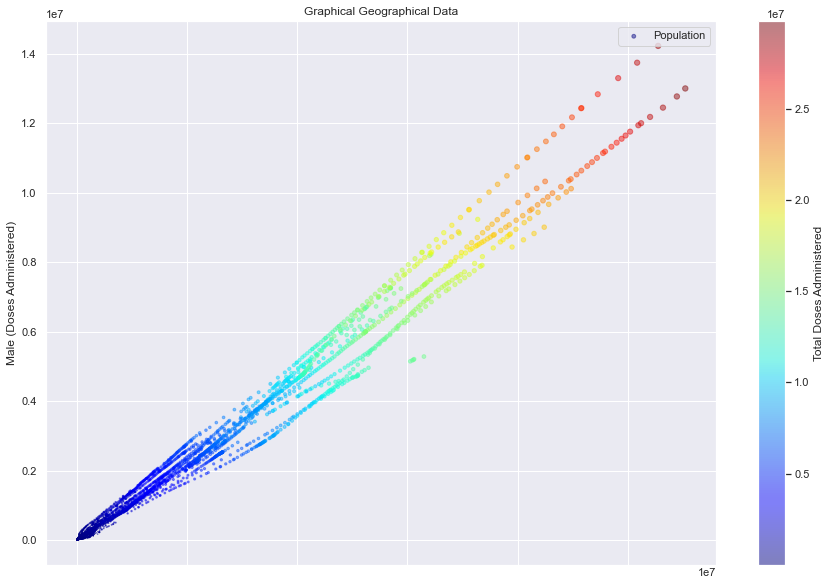

In [111]:
dataset2.plot(kind = 'scatter',x= 'Female (Doses Administered)', y='Male (Doses Administered)', alpha= 0.45,
        s=dataset2['Total Doses Administered']/1000000,c= 'Total Doses Administered', cmap = 'jet',
        label='Population',title ='Graphical Geographical Data',figsize= (15,10));

# Regression 

In [112]:
dataset2=dataset2.drop('Updated On',axis=1)

In [113]:
dataset2=dataset2.drop('State',axis=1);

In [114]:
percent_missing = dataset2.isnull().sum() * 100 / len(dataset2)
missing_value_df1 = pd.DataFrame({'column_name': dataset2.columns,
                                 'percent_missing': percent_missing})
missing_value_df1.sort_values('percent_missing', inplace=True)
missing_value_df1

column_name  \
Total Doses Administered                        Total Doses Administered   
Sessions                                                        Sessions   
 Sites                                                            Sites    
First Dose Administered                          First Dose Administered   
Second Dose Administered                        Second Dose Administered   
Male (Doses Administered)                      Male (Doses Administered)   
Female (Doses Administered)                  Female (Doses Administered)   
Transgender (Doses Administered)        Transgender (Doses Administered)   
 Covaxin (Doses Administered)               Covaxin (Doses Administered)   
CoviShield (Doses Administered)          CoviShield (Doses Administered)   
Total Individuals Vaccinated                Total Individuals Vaccinated   
AEFI                                                                AEFI   
45-60 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)   
60+ Years(Individuals Vaccinated)      60+ Years(Individuals Vaccinated)   
18-44 Years(Individuals Vaccinated)  18-44 Years(Individuals Vaccinated)   
Sputnik V (Doses Administered)            Sputnik V (Doses Administered)   

                                     percent_missing  
Total Doses Administered                    0.000000  
Sessions                                    0.000000  
 Sites                                      0.000000  
First Dose Administered                     0.000000  
Second Dose Administered                    0.000000  
Male (Doses Administered)                   0.000000  
Female (Doses Administered)                 0.000000  
Transgender (Doses Administered)            0.000000  
 Covaxin (Doses Administered)               0.000000  
CoviShield (Doses Administered)             0.000000  
Total Individuals Vaccinated                0.000000  
AEFI                                       36.881403  
45-60 Years(Individuals Vaccinated)        36.916131  
60+ Years(Individuals Vaccinated)          36.916131  
18-44 Years(Individuals Vaccinated)        36.933495  
Sputnik V (Doses Administered)             78.155930

In [115]:
#dropping unuseful columns for regression
dataset2 = dataset2.drop(labels=['AEFI','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)','18-44 Years(Individuals Vaccinated)','Sputnik V (Doses Administered)'],axis=1)

In [116]:
dataset2.head()

Total Doses Administered  Sessions   Sites   First Dose Administered  \
212                      23.0       2.0      2.0                     23.0   
213                      23.0       2.0      2.0                     23.0   
214                      42.0       9.0      2.0                     42.0   
215                      89.0      12.0      2.0                     89.0   
216                     124.0      16.0      3.0                    124.0   

     Second Dose Administered  Male (Doses Administered)  \
212                       0.0                       12.0   
213                       0.0                       12.0   
214                       0.0                       29.0   
215                       0.0                       53.0   
216                       0.0                       67.0   

     Female (Doses Administered)  Transgender (Doses Administered)  \
212                         11.0                               0.0   
213                         11.0                               0.0   
214                         13.0                               0.0   
215                         36.0                               0.0   
216                         57.0                               0.0   

      Covaxin (Doses Administered)  CoviShield (Doses Administered)  \
212                            0.0                             23.0   
213                            0.0                             23.0   
214                            0.0                             42.0   
215                            0.0                             89.0   
216                            0.0                            124.0   

     Total Individuals Vaccinated  
212                          23.0  
213                          23.0  
214                          42.0  
215                          89.0  
216                         124.0

In [117]:
x_train=dataset2.drop('Total Doses Administered',axis=1)

In [118]:
y_train=dataset2['Total Doses Administered']

In [119]:
x_train.head()

Sessions   Sites   First Dose Administered  Second Dose Administered  \
212       2.0      2.0                     23.0                       0.0   
213       2.0      2.0                     23.0                       0.0   
214       9.0      2.0                     42.0                       0.0   
215      12.0      2.0                     89.0                       0.0   
216      16.0      3.0                    124.0                       0.0   

     Male (Doses Administered)  Female (Doses Administered)  \
212                       12.0                         11.0   
213                       12.0                         11.0   
214                       29.0                         13.0   
215                       53.0                         36.0   
216                       67.0                         57.0   

     Transgender (Doses Administered)   Covaxin (Doses Administered)  \
212                               0.0                            0.0   
213                               0.0                            0.0   
214                               0.0                            0.0   
215                               0.0                            0.0   
216                               0.0                            0.0   

     CoviShield (Doses Administered)  Total Individuals Vaccinated  
212                             23.0                          23.0  
213                             23.0                          23.0  
214                             42.0                          42.0  
215                             89.0                          89.0  
216                            124.0                         124.0

In [120]:
y_train.head()

212     23.0
213     23.0
214     42.0
215     89.0
216    124.0
Name: Total Doses Administered, dtype: float64

## Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [122]:
model.fit(x_train,y_train)

LinearRegression()

In [123]:
model.score(x_train,y_train)

1.0

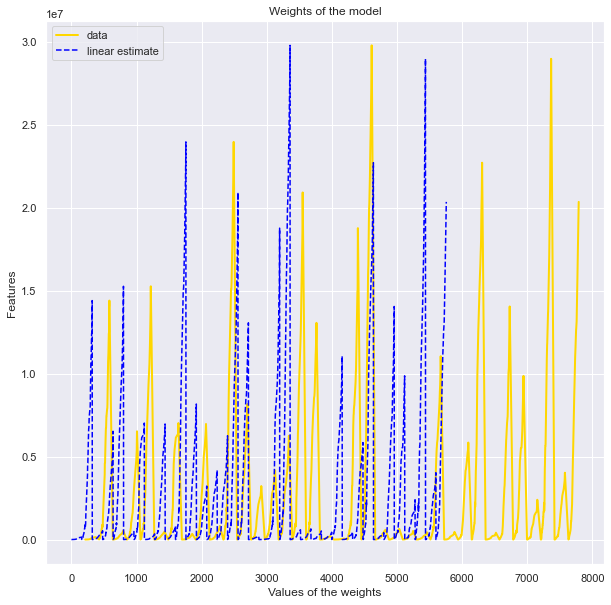

In [124]:
lw = 2
plt.figure(figsize=(10, 10))
plt.title("Weights of the model")
plt.plot(dataset2['Total Doses Administered'], color="gold", linewidth=lw, label="data")
plt.plot(model.predict(x_train), color="blue", linestyle="--", label="linear estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

## Random Forest Regressor
A random forest regressor is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
model1 = RandomForestRegressor()

In [127]:
model1.fit(x_train,y_train)

RandomForestRegressor()

In [128]:
model1.score(x_train,y_train)

0.9999859754500178

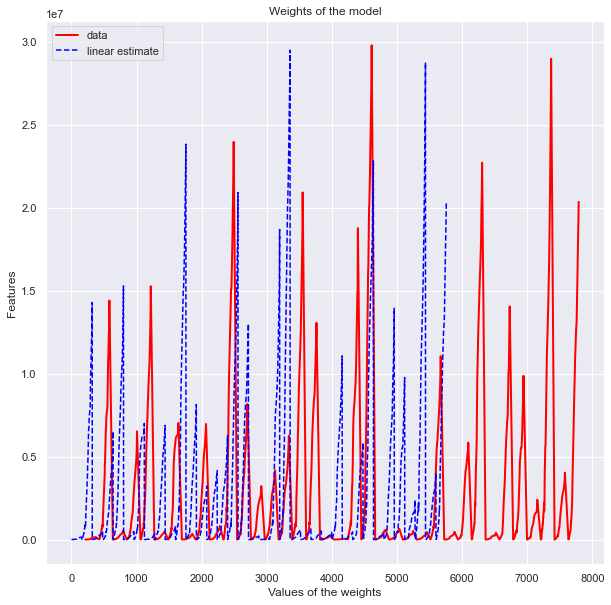

In [129]:
lw = 2
plt.figure(figsize=(10, 10))
plt.title("Weights of the model")
plt.plot(dataset2['Total Doses Administered'], color="red", linewidth=lw, label="data")
plt.plot(model1.predict(x_train), color="blue", linestyle="--", label="linear estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

## Bayesian Ridge
Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response ‘y’ is assumed to drawn from a probability distribution rather than estimated as a single value.

In [130]:
from sklearn.linear_model import BayesianRidge

In [131]:
model2 = BayesianRidge(compute_score=True)

In [132]:
model2.fit(x_train,y_train)

BayesianRidge(compute_score=True)

In [133]:
model2.score(x_train,y_train)

1.0

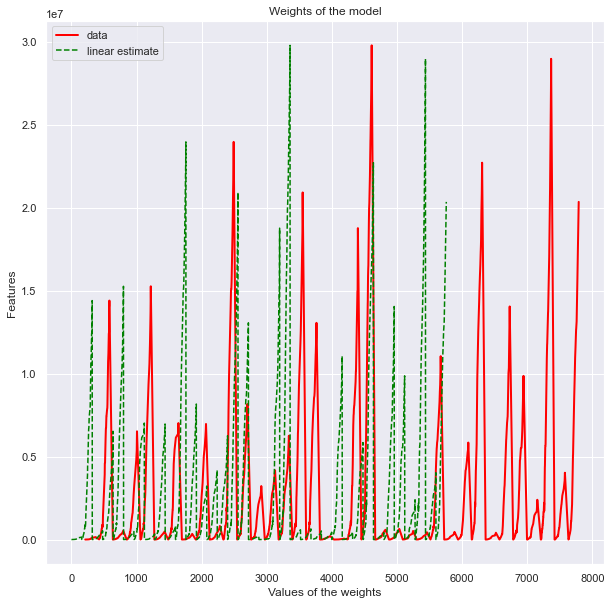

In [134]:
lw = 2
plt.figure(figsize=(10, 10))
plt.title("Weights of the model")
plt.plot(dataset2['Total Doses Administered'], color="red", linewidth=lw, label="data")
plt.plot(model2.predict(x_train), color="green", linestyle="--", label="linear estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

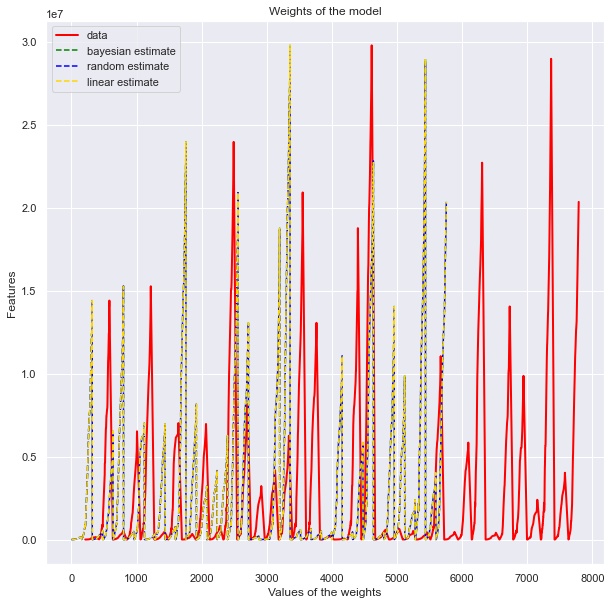

In [135]:
lw = 2
plt.figure(figsize=(10, 10))
plt.title("Weights of the model")
plt.plot(dataset2['Total Doses Administered'], color="red", linewidth=lw, label="data")
plt.plot(model2.predict(x_train), color="green", linestyle="--", label="bayesian estimate")
plt.plot(model1.predict(x_train), color="blue", linestyle="--", label="random estimate")
plt.plot(model.predict(x_train), color="gold", linestyle="--", label="linear estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

Text(0.5, 0, 'Iterations')

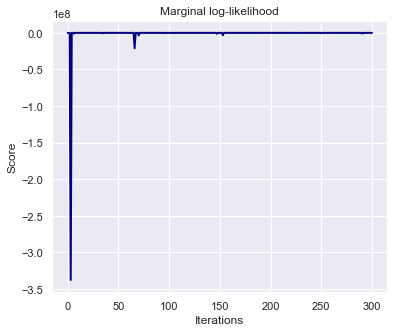

In [136]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(model2.scores_, color="navy", linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

# Conclusion
The coronavirus disease continues to spread across the world following a trajectory that is difficult to predict. The health, humanitarian and socio-economic policies adopted by countries will determine the speed and strength of the recovery.
From the above analysis it is clearly seen that the the covid has hit India in a very disasterous manner and many people died in this and many people got recovered.It is observed that the states having more international contact have suffered alot than any other and in this category Maharastra,Karnataka,Tamil Nadu,Kerala,Gujarat,Delhi etc.
Inthis around 5 billion were cured,73 million were dead between the time of our dataset andWith this our vaccination analysis says that our government has done vaccination in a very efficient manner which lead to the vaccination of almost all people i.e. about 14 billion people got vaccination upto September in which 8 billion were male and 6 billion were female.